In [1]:

## importing the necessary library 
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")

### reading the data as dataframe
df = pd.read_excel('shoes.xlsx',sheet_name="Sheet2")

### deleting the unwanted column
del(df["marketplace"])
del(df["customer_id"])
del(df["review_id"])
del(df["product_parent"])
del(df["vine"])
del(df["review_headline"])
del(df["total_votes"])
del(df["product_category"])

#### create a brand subset
df['product_title']=df['product_title'].apply(lambda x: x.lower())

conditions =[(df['product_title'].str.contains('adidas')),
                (df['product_title'].str.contains('crocs')),
                (df['product_title'].str.contains('skechers'))]
values=['adidas','crocs','skechers']
df['Brand']=np.select(conditions,values)


#### labeling the data using star rating
df["verified_purchase"]=df.verified_purchase.map({'Y':1,'N':0})
df["positivity"] = df["star_rating"].apply(lambda x: 2 if x>3 else(0 if x==3 else 1))

### #Text Cleaning
# 1.1 Define preprocess function
df["review_body"] = df["review_body"].astype("str")
import string
import nltk
#nltk.download('words')
words = set(nltk.corpus.words.words())
stopwords = nltk.corpus.stopwords.words('english')
new_stopwords = ["i've","i'm",'on','ie','thesefor','im']
stopwords.extend(new_stopwords)
import re
wn=nltk.WordNetLemmatizer()


def removing_punc(ele):
    # Convert the text into lowercase
    ele = ele.lower()
    #punctuation
    ele = re.sub('[%s]' % re.escape(string.punctuation), '', ele)
    # number
    ele = re.sub(r'[0-9]', '', ele)
    #new line
    ele = re.sub('\n', '', ele)
    #white space
    ele= re.sub("^\s+", "", ele)
    return ele
df["review_body"]=df["review_body"].apply(lambda x: removing_punc(x))


def tokenize(txt):
    """tokenize each word by using split() function"""
    tokens=re.split('\W+', txt)
    return tokens
df['tokenized_message']=df['review_body'].apply(lambda x: tokenize(x))

def clean_word(txt_tokenized):
    """removed the stopword and remove the numbers and get the base word using lemmatize function"""
    new_word = [word for word in txt_tokenized if word not in stopwords]
    new_word = [word for word in new_word if word.isalpha()]
    new_word = [word for word in new_word if word in words]
    new_word = [wn.lemmatize(word) for word in new_word]
    return " ".join(new_word)
df['st_cleaned_message']=df['tokenized_message'].apply(lambda x:clean_word(x))



In [3]:
df.isnull().sum()

product_id            0
product_title         0
star_rating           0
helpful_votes         0
verified_purchase     0
review_body           0
review_date           0
Brand                 0
positivity            0
tokenized_message     0
st_cleaned_message    0
dtype: int64

# Adidas Text Analysis

In [6]:
### extracting only the adidas shoe brand reviews from the dataset
adidas = df[df["Brand"]=="adidas"].sort_values(by=["review_date"], ascending=False)
### Removing unwanted column
del(adidas['product_title'])
del(adidas['review_body'])
del(adidas['Brand'])
del(adidas["review_date"])
del(adidas['star_rating'])
del(adidas['tokenized_message'])
    
from sklearn.feature_extraction.text import CountVectorizer
#instantiate CountVectorizer() 
#no of feature is 7391
cv=CountVectorizer(max_features=6000) 

# this steps generates word counts for the words 
word_count_vector=cv.fit_transform(adidas['st_cleaned_message'])
x=word_count_vector.toarray()
y=adidas['positivity']


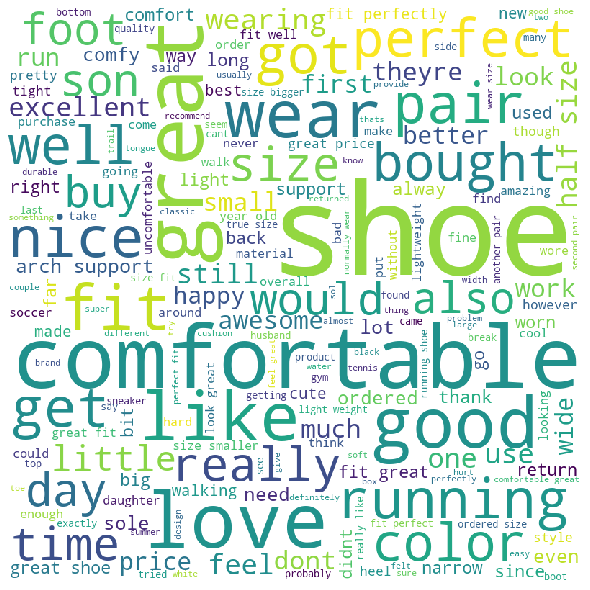

In [7]:
comment_words = ''
from nltk.corpus import stopwords
import string
stop_words = set(stopwords.words('english')+list(string.punctuation)+["let","more",'``',"''","'s"])
from wordcloud import WordCloud 

for val in adidas['st_cleaned_message']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Skechers Text Analysis

In [8]:
### extracting only the skechers shoe brand reviews from the dataset
skechers = df[df["Brand"]=="skechers"].sort_values(by=["review_date"], ascending=False)
### Removing unwanted column
del(skechers['product_title'])
del(skechers['review_body'])
del(skechers['Brand'])
del(skechers["review_date"])
del(skechers['star_rating'])
del(skechers['tokenized_message'])
    
from sklearn.feature_extraction.text import CountVectorizer
#instantiate CountVectorizer() 
#no of feature is 7391
cv=CountVectorizer(max_features=6000) 

# this steps generates word counts for the words 
word_count_vector=cv.fit_transform(skechers['st_cleaned_message'])
x=word_count_vector.toarray()
y=skechers['positivity']

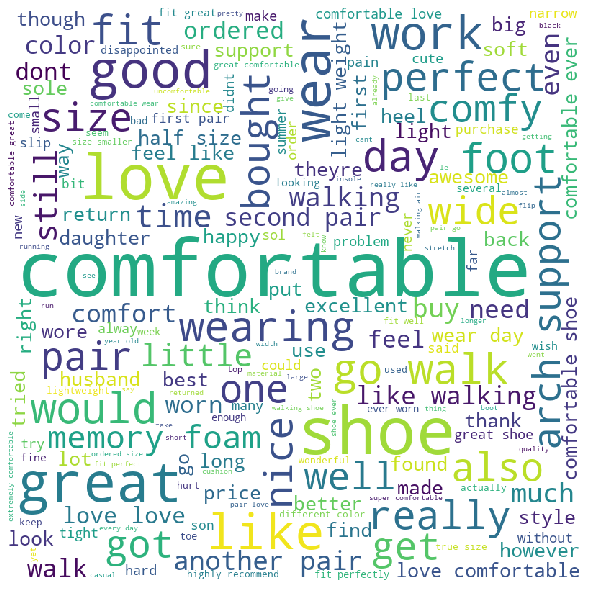

In [10]:
comment_words = ''
from nltk.corpus import stopwords
import string
stop_words = set(stopwords.words('english')+list(string.punctuation)+["let","more",'``',"''","'s"])
from wordcloud import WordCloud 

for val in skechers['st_cleaned_message']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Crocs Text Analysis 

In [11]:
### extracting only the crocs shoe brand reviews from the dataset
crocs = df[df["Brand"]=="crocs"].sort_values(by=["review_date"], ascending=False)
### Removing unwanted column
del(crocs['product_title'])
del(crocs['review_body'])
del(crocs['Brand'])
del(crocs["review_date"])
del(crocs['star_rating'])
del(crocs['tokenized_message'])
    
from sklearn.feature_extraction.text import CountVectorizer
#instantiate CountVectorizer() 
#no of feature is 7391
cv=CountVectorizer(max_features=6000) 

# this steps generates word counts for the words 
word_count_vector=cv.fit_transform(crocs['st_cleaned_message'])
x=word_count_vector.toarray()
y=crocs['positivity']

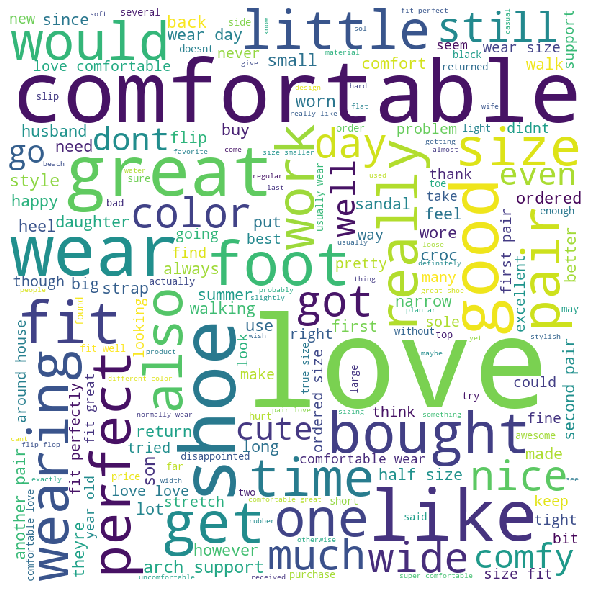

In [12]:
comment_words = ''
from nltk.corpus import stopwords
import string
stop_words = set(stopwords.words('english')+list(string.punctuation)+["let","more",'``',"''","'s"])
from wordcloud import WordCloud 

for val in crocs['st_cleaned_message']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()